In [129]:
# from PIL import Image
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [130]:
def freq_calc( array, band ):
    freq_array = [0]*256
    for i in range(0,array.shape[2]):
        for j in range(0, array.shape[1]):
            freq_array[ array[band][j][i] ] += 1
    return freq_array

In [131]:
def upload_image():
    while True:
        try:
            # Prompt the user to enter the image path
            file_path = input("Please provide the path of the image: ")

            if file_path == "exit" :
                return None
            # Try opening the image directly from the file path
            tci = rasterio.open(file_path)
            #img.verify()  # Check if it's a valid image
            
            print("Image uploaded successfully!")
            #img = Image.open(file_path)  # Re-open to work with the image
            #img.show()  # Display the image
            return tci

        except (IOError, SyntaxError) as e:
            # If an error occurs, it means the file is not a valid image
            print("The file is not a valid image. Please try again.")

In [132]:
tci = upload_image()
#show((tci, [2, 3, 4]), adjust='linear')

Please provide the path of the image:  /Users/ritwikrazneesh/Documents/GNR_1/607_SIP/project/low_con_gangotri_all_bands_sub.tif


Image uploaded successfully!


1 = Costal </br>
2 = Blue </br>
3 = Green </br>
4 = Red </br>
5 = NIR </br>
6 = SWIR1 </br>
7 = SWIR2 </br>
 </br>
RGB

In [134]:
red = int( input("Which band to display as Red : ") )
green = int( input("Which band to display as Green : ") )
blue = int( input("Which band to display as Blue : ") )

Which band to display as Red :  6
Which band to display as Green :  5
Which band to display as Blue :  4


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


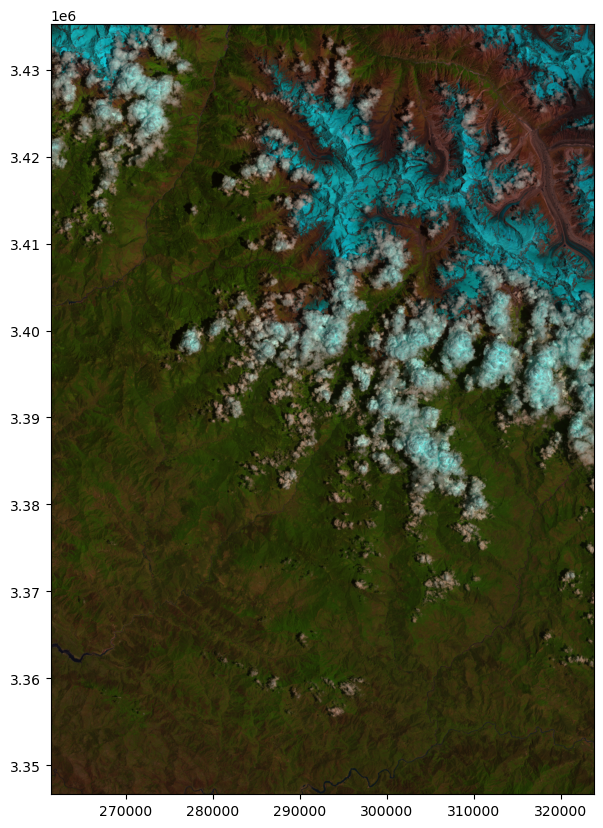

In [135]:
fig, ax = plt.subplots(figsize=(10, 10))
show((tci, [red,green,blue]), adjust='linear', ax=ax)
plt.show()

In [136]:
t = tci.read([6,5,4])
t = (t*(255/65535)).astype('uint8')

In [137]:
Red_freq = freq_calc( t, 0 );

In [138]:
#np.unique(Red_freq).shape

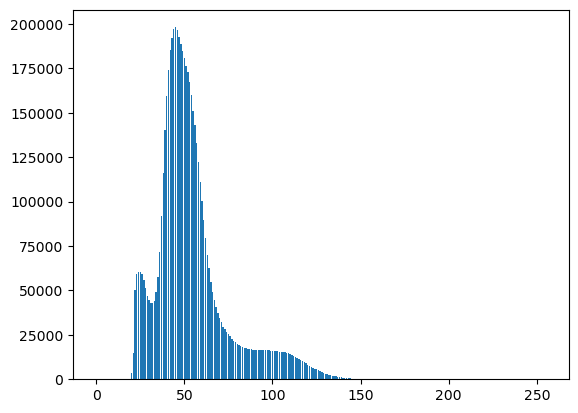

In [139]:
plt.bar(range(0,256), Red_freq);

In [140]:
#plt.bar(np.arange(len(Red_freq)),Red_freq)

In [141]:
Red_cum_freq = [ Red_freq[0] ]
for i in range( 1, 256 ) :
    Red_cum_freq.append( Red_cum_freq[i-1] + Red_freq[i] )

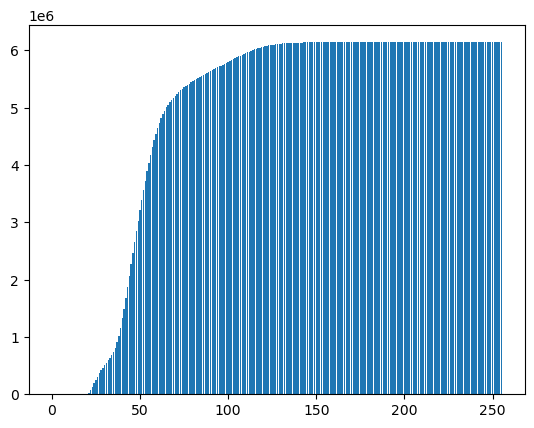

In [142]:
plt.bar( range(0,256), Red_cum_freq );

In [143]:
# check if sum is right
Red_cum_freq[255] == t.shape[1]*t.shape[2]

True

In [144]:
Red_equal_freq = []
pixels = t.shape[1]*t.shape[2]

for i in range( 0, 256 ):
    Red_equal_freq.append( math.floor(Red_cum_freq[i]/(pixels/255)) )

In [145]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[0][j][i] = Red_equal_freq[ t[0][j][i] ]

In [146]:
Red_freq_new = freq_calc( t, 0 );

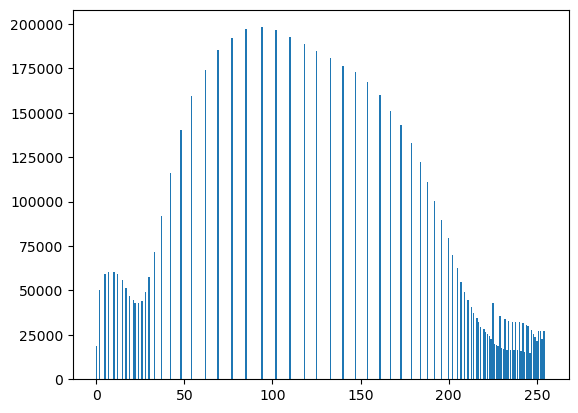

In [147]:
plt.bar( range(0,256), Red_freq_new );

In [148]:
Blue_freq = freq_calc( t, 2 );

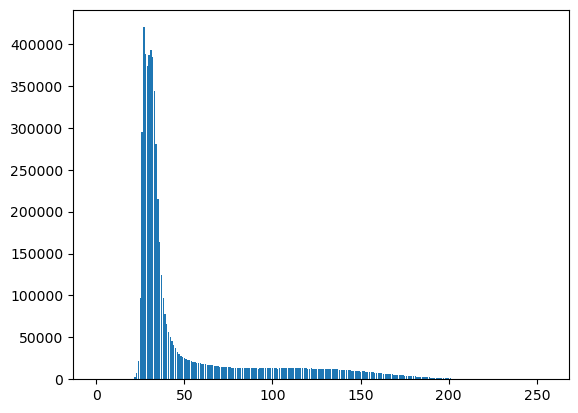

In [149]:
plt.bar(range(0,256), Blue_freq);

In [150]:
Blue_cum_freq = [ Blue_freq[0] ]
for i in range( 1, 256 ) :
    Blue_cum_freq.append( Blue_cum_freq[i-1]+Blue_freq[i] )

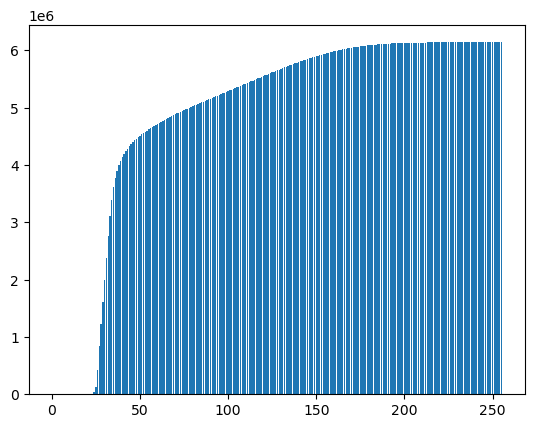

In [151]:
plt.bar( range(0,256), Blue_cum_freq );

In [152]:
# check if sum is right
Blue_cum_freq[255] == t.shape[1]*t.shape[2]

True

In [153]:
Blue_equal_freq = []
pixels = t.shape[1]*t.shape[2]

for i in range( 0, 256 ):
    Blue_equal_freq.append( math.floor(Blue_cum_freq[i]/(pixels/255)) )

In [154]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[2][j][i] = Blue_equal_freq[ t[2][j][i] ]

In [155]:
Blue_freq_new = freq_calc( t, 2 );

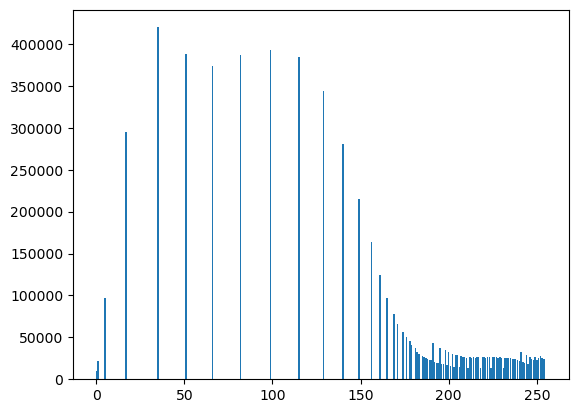

In [156]:
plt.bar( range(0,256), Blue_freq_new );

In [157]:
Green_freq = freq_calc( t, 1 );

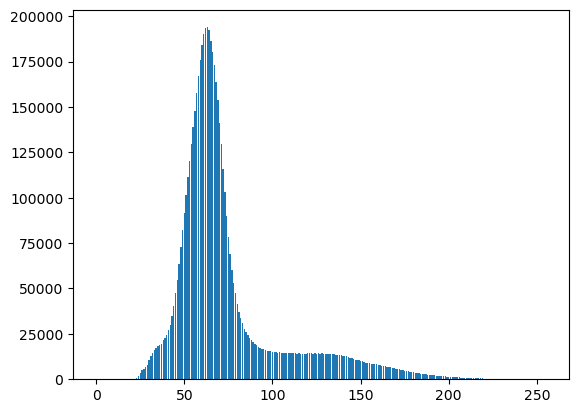

In [158]:
plt.bar(range(0,256), Green_freq);

In [159]:
Green_cum_freq = [ Green_freq[0] ]
for i in range( 1, 256 ) :
    Green_cum_freq.append( Green_cum_freq[i-1]+Green_freq[i] )

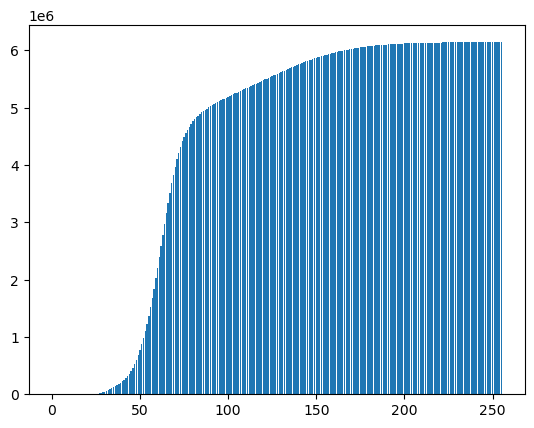

In [160]:
plt.bar( range(0,256), Green_cum_freq );

In [161]:
# check if sum is right
Green_cum_freq[255] == t.shape[1]*t.shape[2]

True

In [162]:
Green_equal_freq = []
pixels = t.shape[1]*t.shape[2]

for i in range( 0, 256 ):
    Green_equal_freq.append( math.floor(Green_cum_freq[i]/(pixels/255)) )

In [163]:
for i in range(0,t.shape[2]):
    for j in range( 0, t.shape[1] ):
        t[1][j][i] = Green_equal_freq[ t[1][j][i] ]

In [164]:
Green_freq_new = freq_calc( t, 1 );

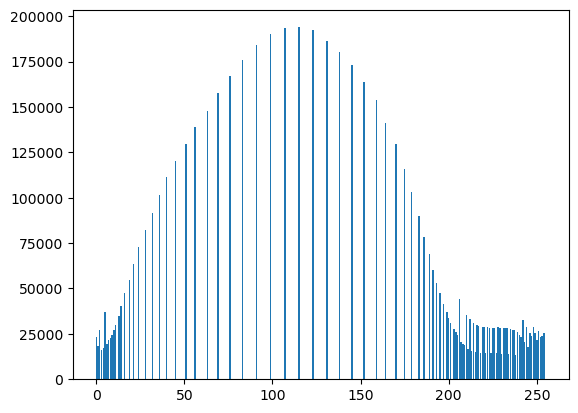

In [165]:
plt.bar( range(0,256), Green_freq_new );

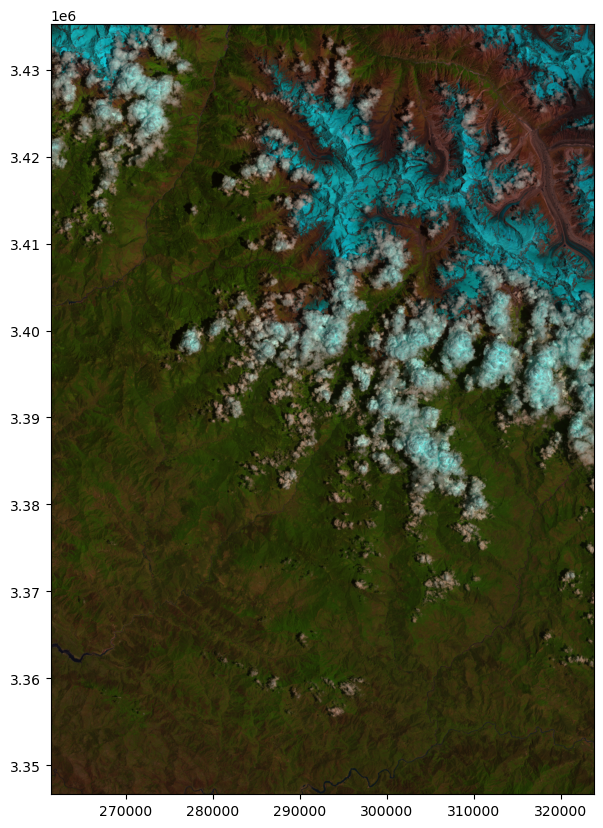

In [166]:
fig, ax = plt.subplots(figsize=(10, 10))
show((tci, [red,green,blue]), adjust='linear', ax=ax)
plt.show()

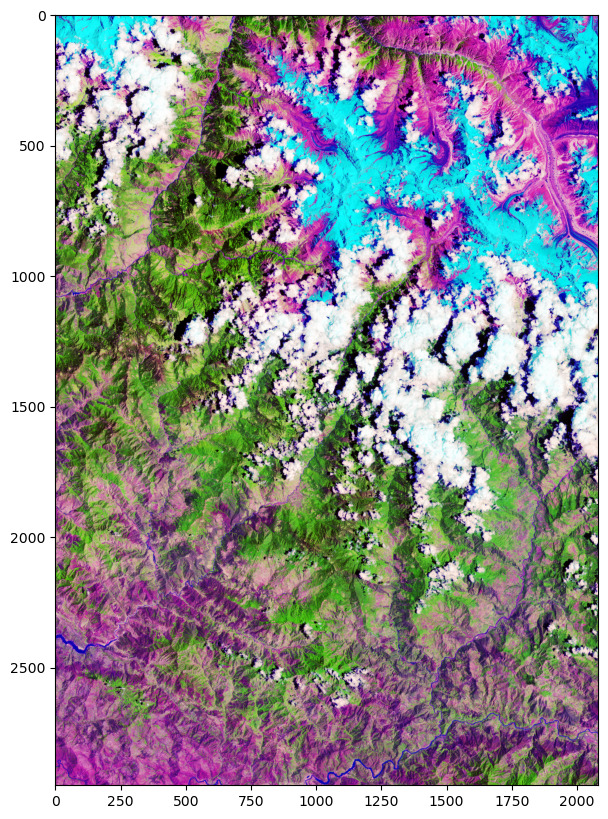

In [167]:
fig, ax = plt.subplots(figsize=(10, 10))
show(t, adjust='linear', ax=ax)
plt.show()

-------
</br></br></br></br>